In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
file = 'global_data_4_1'
time_bins = np.arange(0,24,float(file.split('_')[-1]))
H_bins = np.arange(90,130,float(file.split('_')[-2]))

shape = len(time_bins) * len(H_bins)

file_path = f'../../Output/{file}.csv'

In [3]:
data_df = pd.read_csv(file_path,low_memory=False)
Ne_EXP = np.array(data_df['EXP Density']).reshape(-1,shape)
dNe_EXP =  np.array(data_df['EXP Density Error']).reshape(-1,shape)
Ne_WACCM = np.array(data_df['WACCM Density']).reshape(-1,shape)
mag_EXP = np.array(data_df['EXP Magnitude']).reshape(-1,shape)
mag_WACCM = np.array(data_df['WACCM Magnitude']).reshape(-1,shape)
height = np.array(data_df['Height']).reshape(-1,shape)
Date = np.array(data_df['Date']).reshape(-1,shape)[:,0]
Svalbard = np.array(data_df ['Svalbard']).reshape(-1,shape)[:,0] == 1
Tromso = np.array(data_df['Tromso']).reshape(-1,shape)[:,0] == 1
Geomagnetic_Event = np.array(data_df['Geomagnetic Event']).reshape(-1,shape)[:,0] == 1
Solar_Proton_Event = np.array(data_df['Solar Proton Event']).reshape(-1,shape)[:,0] == 1

mask, type = (Geomagnetic_Event) + (Solar_Proton_Event), 'active'

Ne_EXP = Ne_EXP[mask]
dNe_EXP = dNe_EXP[mask]
Ne_WACCM = Ne_WACCM[mask]

mag_EXP = mag_EXP[mask]
mag_WACCM = mag_WACCM[mask]

Date = Date[mask]

height = height[mask]

Geomagnetic_Event = Geomagnetic_Event[mask]
Solar_Proton_Event = Solar_Proton_Event[mask]

/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_58772/1384383623.py:2: RuntimeWarning: invalid value encountered in divide
  norm_diff = (Ne_WACCM - Ne_EXP) / (Ne_WACCM + Ne_EXP)


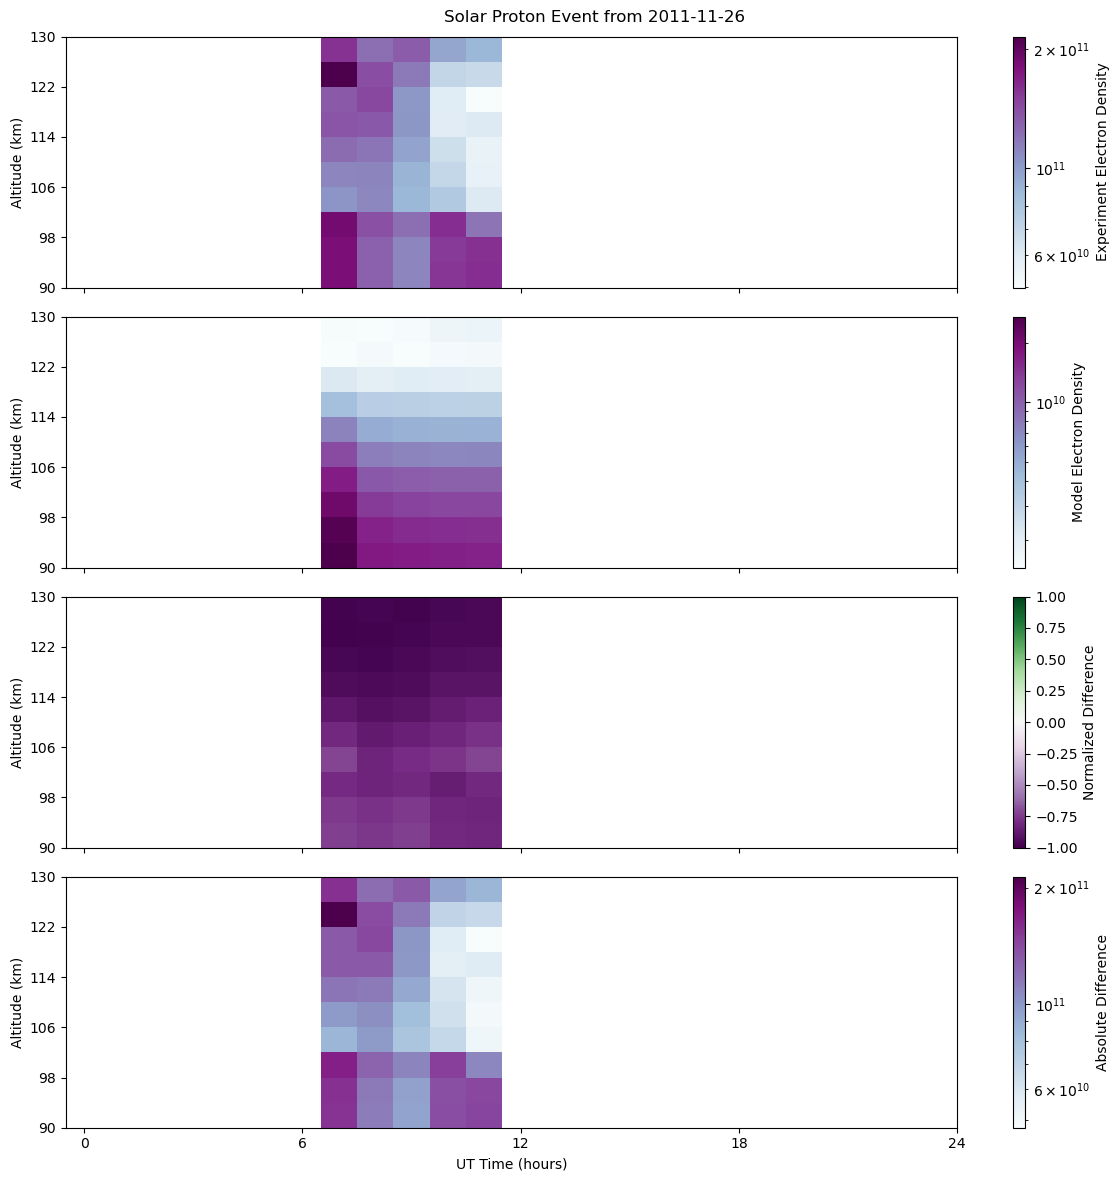

In [20]:
abs_diff = np.abs(Ne_WACCM - Ne_EXP).astype(float)
norm_diff = (Ne_WACCM - Ne_EXP) / (Ne_WACCM + Ne_EXP)

index = 15
index = np.min([index, len(Geomagnetic_Event)-1])
date = Date[index]

event_type = 'Geomagnetic Event' if Geomagnetic_Event[index] else 'Solar Proton Event'

fig, axs = plt.subplots(4, figsize=(12, 12), sharex=True)
fig.suptitle(f'{event_type} from {str(date)}')

X, Y = np.meshgrid(time_bins, H_bins+2)

grid = Ne_EXP[index].reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[0].pcolormesh(X, Y, grid, cmap='BuPu', norm=LogNorm(vmin=np.nanmin(grid[grid != 0]), vmax=np.nanmax(grid)))
cbar = fig.colorbar(sc, ax=axs[0])
cbar.set_label(r'Experiment Electron Density')

grid = Ne_WACCM[index].reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[1].pcolormesh(X, Y, grid, cmap='BuPu', norm=LogNorm(vmin=np.nanmin(grid[grid != 0]), vmax=np.nanmax(grid)))
cbar = fig.colorbar(sc, ax=axs[1])
cbar.set_label(r'Model Electron Density')

grid = norm_diff[index].reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[2].pcolormesh(X, Y, grid, cmap='PRGn', vmin=-1, vmax=1)
cbar = fig.colorbar(sc, ax=axs[2])
cbar.set_label(r'Normalized Difference')

grid = abs_diff[index].reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[3].pcolormesh(X, Y, grid, cmap='BuPu', norm=LogNorm(vmin=np.nanmin(grid[grid != 0]), vmax=np.nanmax(grid)))
cbar = fig.colorbar(sc, ax=axs[3])
cbar.set_label(r'Absolute Difference')


for ax in axs:
    ax.set_ylabel('Altitude (km)')
    ax.set_yticks(np.linspace(90,130,6))
    ax.set_ylim(90,130)

axs[-1].set_xlabel('UT Time (hours)')
axs[-1].set_xticks(np.linspace(0,24,5))

plt.tight_layout()
plt.savefig(f'../../Output/Figures/events/{date}.png')
plt.show()